# Handwritten Number Recogition 

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

## Loading the data and data pre-processing

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

(28, 28)

The corresponding value to this is 5



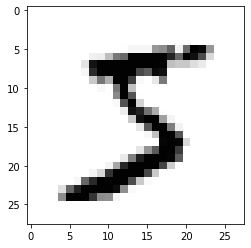

In [4]:
print(x_train[0].shape)
print()
plt.imshow(x_train[0], cmap='Greys')
print('The corresponding value to this is ' + str(y_train[0]))
print()

In [5]:
# converting the output to categorical labels
y_cat_train=to_categorical(y_train, num_classes=10)
y_cat_test=to_categorical(y_test, num_classes=10)

In [6]:
print(y_cat_train.shape)
print(y_cat_test.shape)

(60000, 10)
(10000, 10)


In [7]:
# scaling the data
x_train=x_train/255
x_test=x_test/255

In [8]:
# .reshape(batch_size, width, height, color_channels)
x_train=x_train.reshape(60000, 28, 28, 1)
x_test=x_test.reshape(10000, 28, 28, 1)

## Building the model

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) #SoftMax activation being used for a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
early_stop=EarlyStopping(monitor='val_loss', patience=1)

In [11]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1370 - accuracy: 0.9589 - val_loss: 0.0693 - val_accuracy: 0.9774
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0467 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0395 - val_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0422 - val_accuracy: 0.9877


## Model Evaluation

In [12]:
metrics=pd.DataFrame(model.history.history)

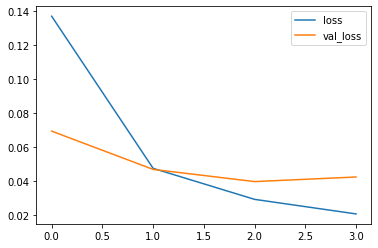

In [13]:
metrics[['loss', 'val_loss']].plot()

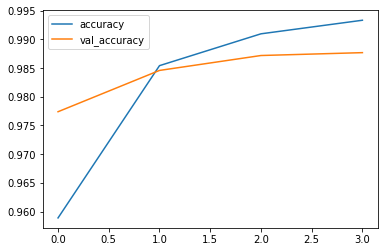

In [14]:
metrics[['accuracy', 'val_accuracy']].plot()

In [15]:
model.metrics_names

['loss', 'accuracy']

In [16]:
model.evaluate(x_test, y_cat_test, verbose=1)

313/313 [==============================] - 2s 8ms/step - loss: 0.0422 - accuracy: 0.9877


[0.04224170371890068, 0.9876999855041504]

In [17]:
predictions=np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 2s 7ms/step


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



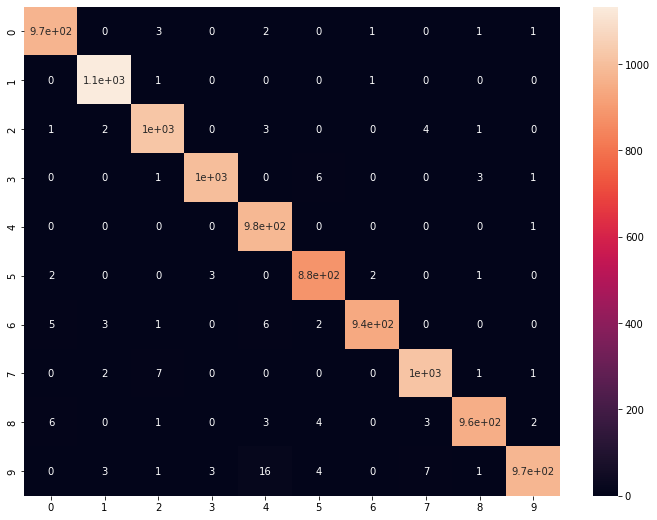

In [19]:
plt.figure(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

## Prediction system

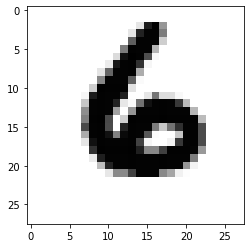

In [20]:
rnd=random.randint(0, 10000)
plt.imshow(x_test[rnd].reshape(28, 28), cmap='Greys')

In [21]:
print("The written number is " + str(np.argmax(model.predict(x_test[rnd].reshape(1, 28, 28, 1), verbose=0),axis=1)[0]))

The written number is 6
